<a href="https://colab.research.google.com/github/Anshigupta/ml-projects-/blob/main/logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes dataset is given.We go through the dataset,analyses it.Get some useful insight and then using it ,build a logistic model which will predict whether a person is having diabetes or not. Later,we find our model accuracy,precision,recall.f1_scorw,auc and roc_curve.

IMPORTING LIBRARIES

In [102]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression



In [103]:
# load the dataset
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
# describe the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [105]:
# values in the data
data.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [106]:
# to get the additional information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [107]:
# checking for null values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

plotting a graph to see the relationship


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

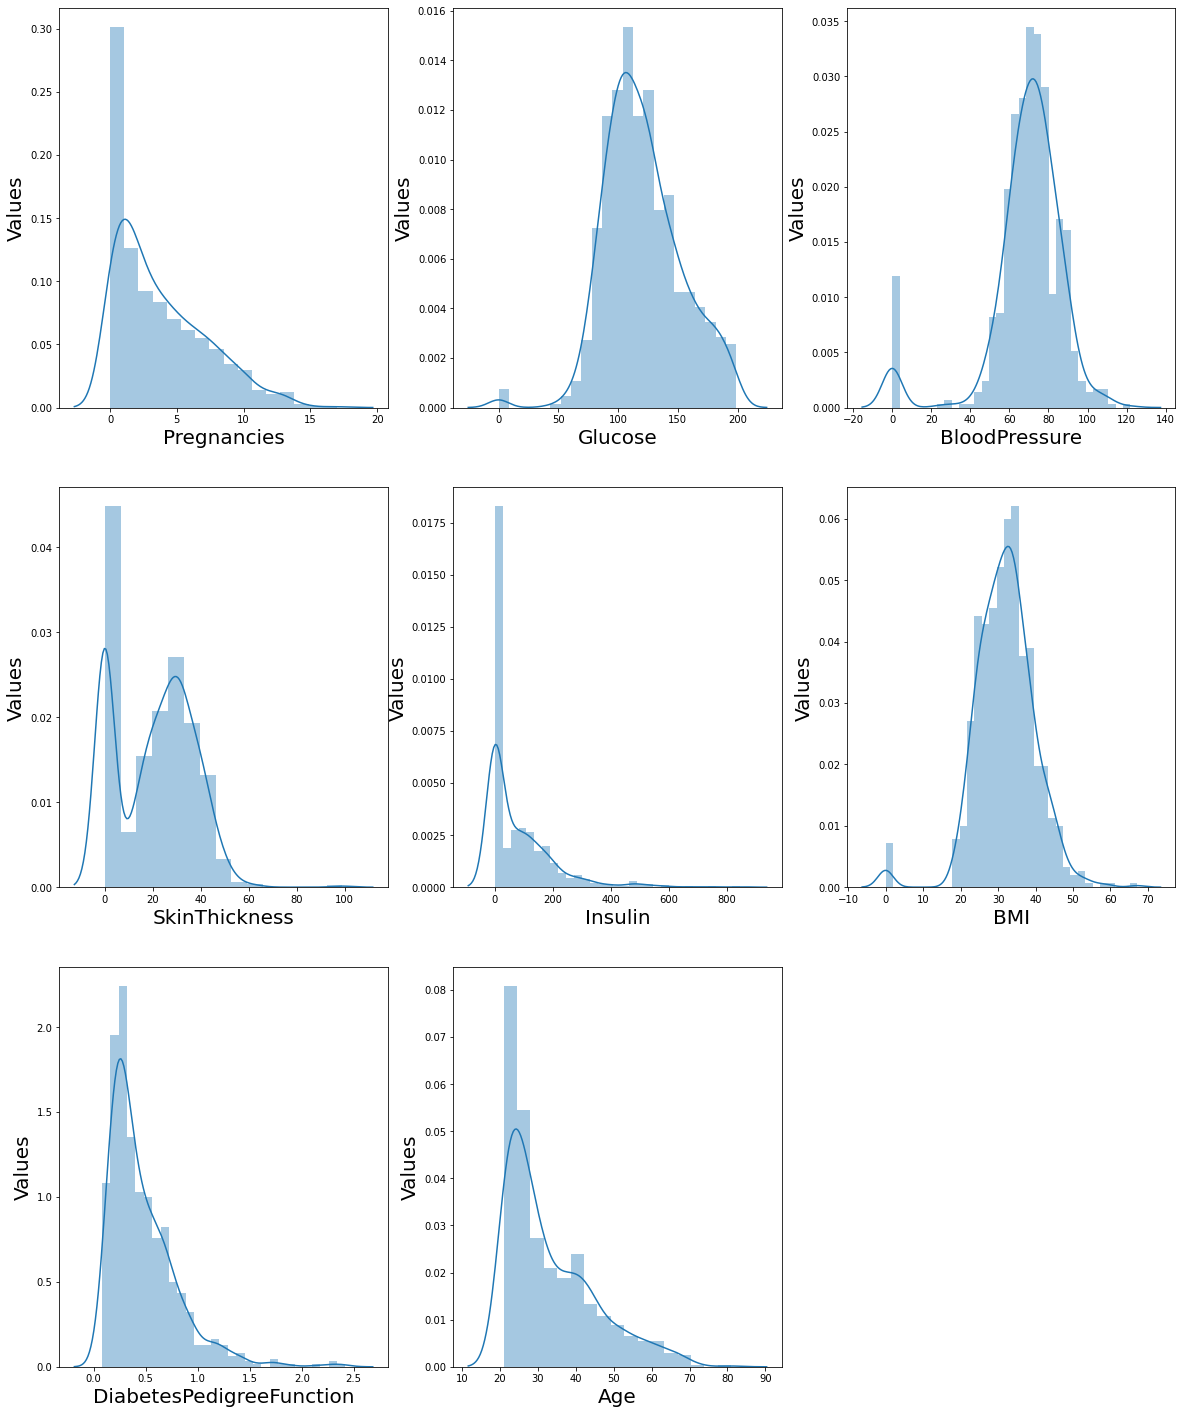

In [108]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
  if plotnumber<9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Values',fontsize=20)
  plotnumber+=1
plt.show()

In [109]:
data[data['Insulin']==0].sum()

Pregnancies                  1658.000
Glucose                     44659.000
BloodPressure               25235.000
SkinThickness                4304.000
Insulin                         0.000
BMI                         11572.800
DiabetesPedigreeFunction      155.337
Age                         13388.000
Outcome                       138.000
dtype: float64

In [110]:
# replace the 0 with the  mean of the column value to get the better result

data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BMI'].mean())
data['Glucose']=data['Glucose'].replace(0,data['BMI'].mean())
data['Insulin']=data['Insulin'].replace(0,data['BMI'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['BMI'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

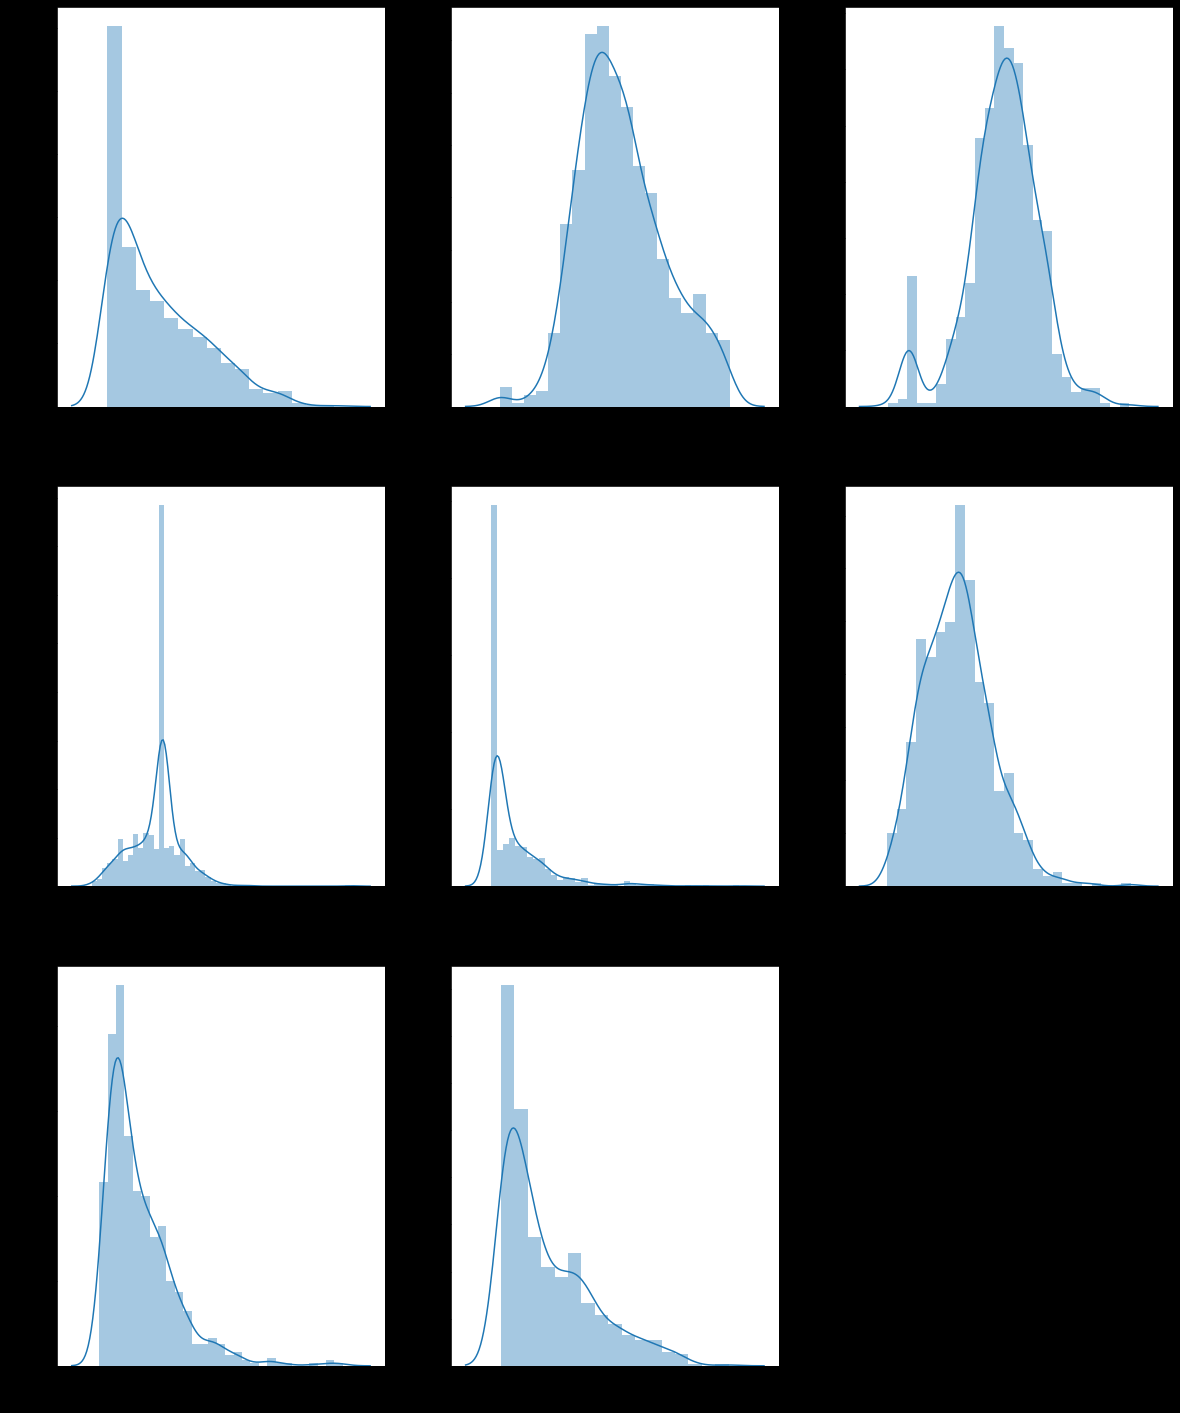

In [111]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='black')
plotnumber=1

for column in data:
  if plotnumber<9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)

  plotnumber+=1

plt.show()

Now,we deal with the 0 values.But there are still some outliers in columns.let's deal with it.

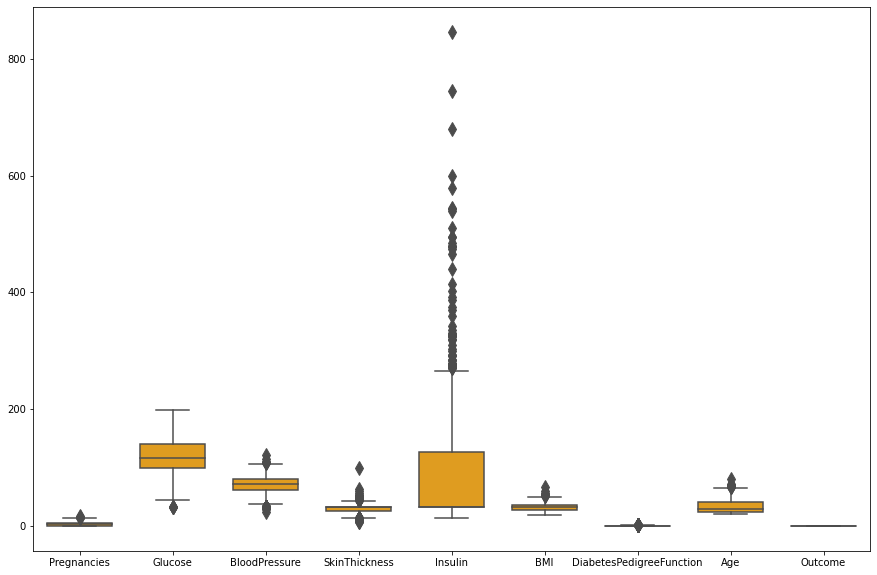

In [112]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.7,ax=ax,fliersize=10,color='orange')

In [113]:
q=data['Insulin'].quantile(0.95)
data_cleaned=data[data['Insulin']<q]

In [114]:
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,32.450805,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,32.450805,26.6,0.351,31,0
2,8,183.0,64.0,32.450805,32.450805,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,32.450805,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,32.450805,32.450805,30.1,0.349,47,1


In [115]:
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Pregnancies']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

In [116]:
# making features and label
x=data.drop(columns=['Outcome'])
y=data.Outcome

let's visualize the relationship between variables and categories.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

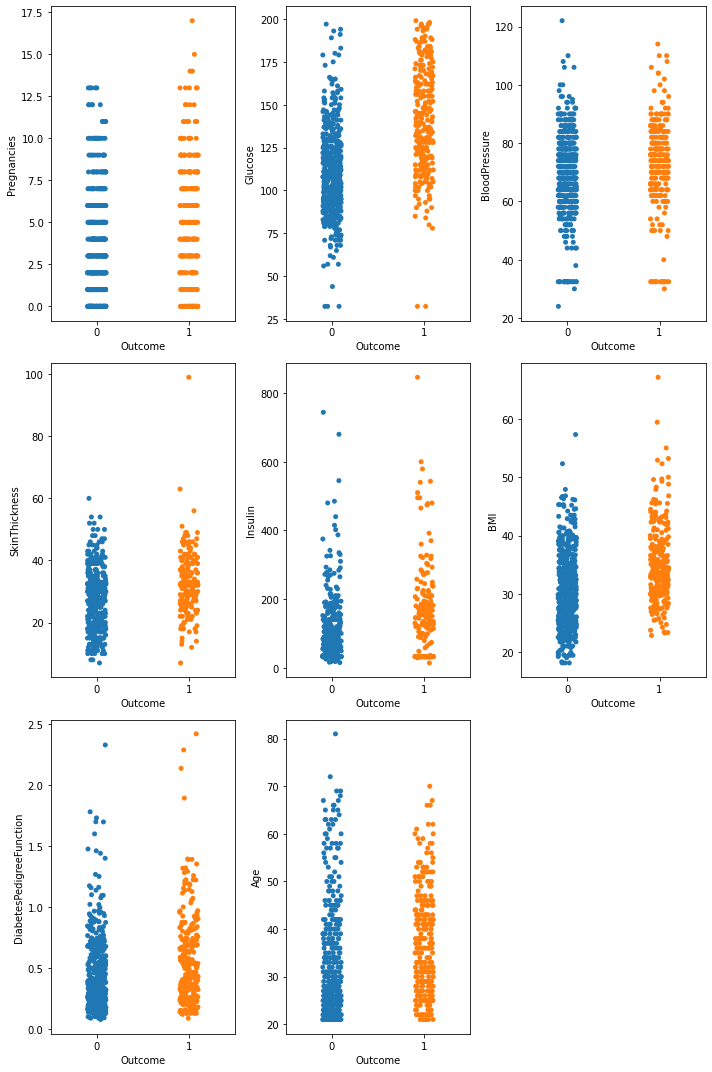

In [117]:
plt.figure(figsize=(10,15))
plotnumber=1

for column in x:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.stripplot(y,x[column])
  plotnumber+=1

plt.tight_layout()

sscaling the data to get better result.

In [118]:
scalar = StandardScaler()
scaled = scalar.fit_transform(x)

In [119]:
scaled

array([[ 0.63994726,  0.86057758,  0.09641992, ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.15533613, -0.31223908, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.98052965, -0.44845875, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.00338544,  0.09641992, ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.15660771, -0.72089808, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.89934709, -0.03979975, ..., -0.29847711,
        -0.47378505, -0.87137393]])

check for the multicollinearity.

In [120]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.431796,Pregnancies
1,1.311008,Glucose
2,1.171307,BloodPressure
3,1.421512,SkinThickness
4,1.209595,Insulin
5,1.520615,BMI
6,1.056814,DiabetesPedigreeFunction
7,1.616447,Age


Here,vif is less than 5.So,there is no multicollinearity.

Split the dataset

In [121]:
x_train,x_test,y_train,y_test = train_test_split(scaled,y,test_size=0.25,random_state=355)

When we fit the data.It find the best fitted line which helps to classify the data based on their probability using **logit function**.

In [122]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
y_pred=logreg.predict(x_test)

In [124]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7604166666666666

 Confusion matrix to get the model evaluation.

 
 1.accuracy
 2.recall
 3.precision
 4.f1_score

In [125]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[109,  16],
       [ 30,  37]])

In [126]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [127]:
accuracy = (true_positive+true_negative) / (true_positive+true_negative+false_negative+false_positive)
accuracy

0.7604166666666666

In [128]:
recall = true_positive / (true_positive + false_negative)
recall

0.7841726618705036

In [129]:
precision = true_positive / (true_positive+false_positive)
precision

0.872

In [130]:
f1_score = 2 * (recall*precision) / (recall+precision)
f1_score

0.8257575757575759

AUC Curve is used to get the best model for our data.

In [131]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7121194029850747

ROC Curve:

It is used to get the threshold for our model and get the value.

In [132]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

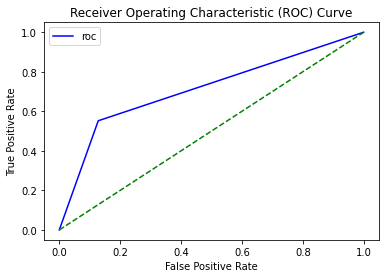

In [133]:
plt.plot(fpr,tpr,color='blue',label='roc')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()